In [1]:
using DelimitedFiles    # Leitura/escrita de ficheiros em formato csv (delimitados por ,) 
using Statistics        # Estatística descritiva, inclui cálculo do desvio-padrão e quantis
using Distributions     # Distribuições de probabilidade
using StatsPlots        # Gráficos 

### 1.1 Noção e Tipologia dos Riscos Financeiros

#### 1.1.1. Noção de risco

![RiskNotion.png](Imagens/RiskNotion.png)

Qual o investimento de maior risco, A ou B?

O investimento B tem maior risco! Em finanças associamos normalmente risco à incerteza ou 
amplitude dos retornos, ou seja ao seu desvio-parão.

Coloquialmente diríamos que A tem maior risco, mas nesse caso teríamos de qualificar 
o risco, falando de risco de PERDA.

Estes dois tipos de risco, <u>risco total</u> e <u>risco de perda</u>, irão desempenhar um papel muito importante nas análises que se irão seguir.

#### 1.1.2. Tipologia dos riscos financeiros 

Risco de Mercado
 * Risco preço de ações: resulta da exposição a variações de preços e volatilidades de ações individuais, carteiras de ações e índices de ações.
 * Risco cambial: resulta da exposição a variações de preços <i>spot</i>, preços <i>forward</i> e à volatilidade de taxas de câmbio. 
 * Risco taxa de juro: resulta da exposção a variações (i) no nível, inclinação e curvatura da estrutura temporal de taxas de juro, (ii) da volatilidade de taxas de juro, (iii) na velocidade de reembolsos antecipados (<i>prepayment</i>) e (iv) <i>spreads</i> de crédito.
 * Risco preço de <i>commodities</i>: resulta da exposição a variações de preços <i>spot</i>, preços <i>forward</i> e volatilidades de <i>commodities</i>, tais como <i>crude oil</i>, produtos de petróleo, gás natural, electricidade, metais preciosos e metais base.

Risco de Crédito
 * Concessão crédito
 * Risco contraparte

Risco Operacional

### 1.2. Medidas de Risco

#### 1.2.1. Medida de Risco Total: Volatilidade 

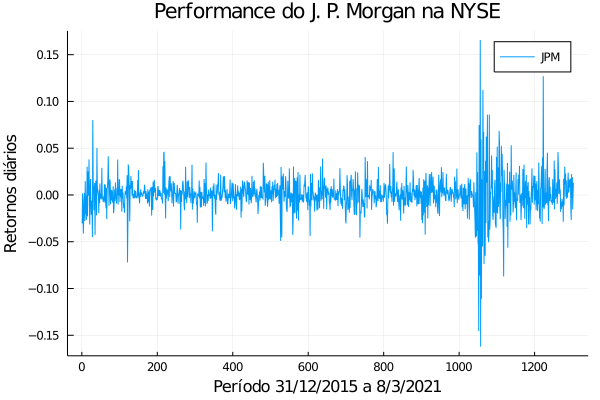

In [3]:
JPMorgan = vec(readdlm("Dados/JPMorgan.csv"))
display(plot(JPMorgan, title = "Performance do J. P. Morgan na NYSE",label = "JPM", 
        ylabel = "Retornos diários", xlabel = "Período 31/12/2015 a 8/3/2021"))

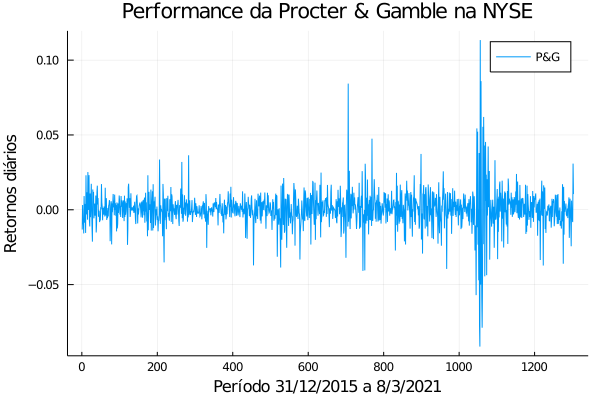

In [4]:
PG = vec(readdlm("Dados/Procter&Gamble.csv"))
display(plot(PG, title = "Performance da Procter & Gamble na NYSE",label = "P&G", 
        ylabel = "Retornos diários", xlabel = "Período 31/12/2015 a 8/3/2021"))

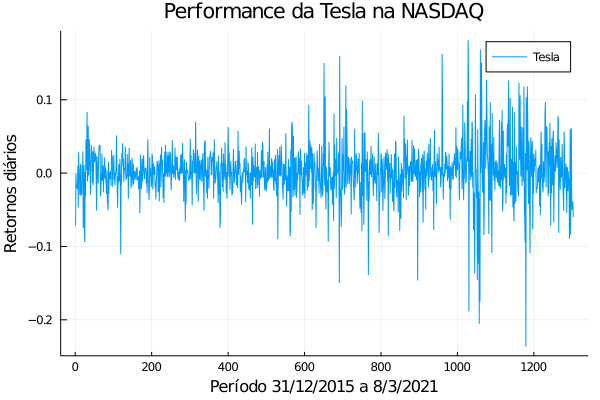

In [5]:
Tesla = vec(readdlm("Dados/Tesla.csv"))
display(plot(Tesla, title = "Performance da Tesla na NASDAQ",label = "Tesla", 
        ylabel = "Retornos diários", xlabel = "Período 31/12/2015 a 8/3/2021"))

In [18]:
println("σ(J.P.Morgan) = ", std(JPMorgan))
println("σ(Procter & Gamble) = ", std(PG))
println("σ(Tesla) = ",std(Tesla))

σ(J.P.Morgan) = 0.01911319719033801
σ(Procter & Gamble) = 0.012583667203944944
σ(Tesla) = 0.03657417332784471


#### 1.2.2. Medidas de Risco de Perda: Value-at-Risk (VaR) e Expected-Tail-Loss (ETL)

As medidas de risco VaR e ETL são calculadas para (i) um dado portfolio, (ii) horizonte temporal, e (iii) a probabilidade α, e pressupõem uma determinada distribuição de probabilidade para os retornos. 

Por exemplo:
* VaR(α=5%) diário = 50 000 Eur, significa que existe uma probabilidade de 5% de num dia a carteira vir a ter uma perda superior a 50 000 Eur. 
* ETL(α=5%) diário = 65 000 Eur, significa que para os 5% piores desempenhos diários, em média, a carteira irá ter uma perda superior a 65 000 Eur.

O VaR diário denomina-se DEaR (<i>Daily-Earnigs-at-Risk</i>). O ETL também é frequentemente denominado como <i>Expected Shortfall</i> (ES) ou <i>Conditional Value-at-Risk</i> (CVaR)

As medidas de risco VaR e ETL têm quatro usos principais em finanças:
* gestão de risco
* controlo financeiro
* relato financeiro 
* cálculo do capital regulatório

In [19]:
# Definição do VaR ao nível de significância α ou nível de confiança (1-α)
VaR(distribuição, α, Carteira) = -(quantile(distribuição,α) - mean(distribuição)) * Carteira;

### 1.3. Determinação do VaR e ETL


Metodologias:
* Abordagem empírica por <u>simulação histórica</u>
* Abordagem paramétrica pelo <u>método analítico</u>
* Abordagem paramétrica por <u>simulação de Monte-Carlo</u>

In [20]:
# Nos exemplos seguintes, o valor da carteira é igual a 1 000 000 USD e o α é igual a 5.0%

Carteira = 1000000;
α = 0.05;

#### 1.3.1. Cálculo do VaR por simulação histórica

Séries temporais históricas observadas de retornos → VaR, ETL

In [21]:
println("VaR diário JPMorgan = ", VaR(JPMorgan, α, Carteira), " USD")
println("VaR diário Procter & Gamble = ", VaR(PG, α, Carteira), " USD")
println("VaR diário Tesla = ", VaR(Tesla, α, Carteira), " USD")

VaR diário JPMorgan = 27489.89319523052 USD
VaR diário Procter & Gamble = 16811.378438936405 USD
VaR diário Tesla = 53186.85326003964 USD


#### 1.3.2. Cálculo do VaR pelo método analítico

Distribuição, parãmetros estimados → Fórmula analítica → VaR, ETL

- Estimar parâmetros da distribuição escolhida. Neste exemplo, iremos escolher uma distribuição Normal - que assumimos bem caracterizar a distribuição dos retornos - e estimar os seus parâmetros (μ, σ)
- Utilizando a distribuição estimada, determinamos de seguida analiticamente o VaR 

Denotando por $\Phi$ a cumulativa da Normal($\mu,\sigma$), tem-se

$$\text{quantil}(\text{Normal}(\alpha\mid \mu, \sigma)) = \Phi^{-1}(\alpha\mid \mu, \sigma)$$ 
sendo $$\Phi(\alpha\mid \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}\int_{-\infty}^\alpha \exp\bigl({-\tfrac{1}{2}(x-\mu)^2/\sigma}\bigr)$$

In [23]:
# Estimar parâmetros da distribuição Normal para os retornos diários do J.P.Morgan, 
# Procter & Gamble e Tesla
println(fit(Normal, JPMorgan))
println(fit(Normal, PG))
println(fit(Normal, Tesla))

Normal{Float64}(μ=0.0007579467122181148, σ=0.01910586147823117)
Normal{Float64}(μ=0.00048190465996873977, σ=0.012578837548344319)
Normal{Float64}(μ=0.0018895141782965422, σ=0.036560136031865066)


In [24]:
# Utilizando a distribuição Normal com os parâmetros estimados, determinamos o VaR
println("VaR J.P.Morgan = ", VaR(fit(Normal, JPMorgan), α, Carteira), " USD")
println("VaR Procter & Gamble = ", VaR(fit(Normal, PG), α, Carteira), " USD")
println("VaR Tesla = ", VaR(fit(Normal, Tesla), α, Carteira), " USD")

VaR J.P.Morgan = 31426.34554850096 USD
VaR Procter & Gamble = 20690.346564227522 USD
VaR Tesla = 60136.07235385247 USD


#### 1.3.3. Cálculo do VaR por simulação de Monte-Carlo

Distribuição, parãmetros estimados → Séries temporais simuladas de retornos → VaR, ETL

- Estimar parâmetros da distribuição escolhida. Neste exemplo, iremos escolher uma distribuição Normal - que assumimos bem caracterizar a distribuição dos retornos - e estimar os seus parâmetros (μ, σ)
- Utilizando a distribuição estimada, simulamos os retornos e a partir desses valores simulados calculamos o VaR

In [25]:
# Utilizando os parâmetros estimados anteriormente para a distribuição Normal, simular 1000 
# retornos diários para essa distribuiçao
JPMorgan_sim = rand(fit(Normal, JPMorgan), 1000)
PG_sim = rand(fit(Normal, PG), 1000)
Tesla_sim = rand(fit(Normal, Tesla), 1000)

1000-element Vector{Float64}:
  0.00987626207809301
  0.014568290311403517
 -0.04176339518843928
  0.10627690351991842
  0.023686411861791216
 -0.07499763060413596
  0.03421826872955139
  0.0443804349076174
 -0.021451109424064366
  0.05443743443940026
 -0.013812675661729348
  0.034109921240074136
 -0.02605973240874425
  ⋮
 -0.04274262483273103
  0.00767981981217658
 -0.12074009512933444
  0.033897076130162775
 -0.0230196509399555
  0.01838075393207198
 -0.016129984529130864
  0.016531916079489804
  0.03807747635469718
  0.0642609193115757
  0.008493656030005755
 -0.017499058120164262

In [26]:
println("VaR J.P.Morgan = ", VaR(JPMorgan_sim, α, Carteira), " USD")
println("VaR Procter & Gamble = ", VaR(PG_sim, α, Carteira), " USD")
println("VaR Tesla = ", VaR(Tesla_sim, α, Carteira), " USD")

VaR J.P.Morgan = 31539.473805542173 USD
VaR Procter & Gamble = 20342.602183058785 USD
VaR Tesla = 60858.64404568003 USD


#### 1.3.4. VaR média e VaR zero

As estimativas que temos vindo a realizar para o VaR, calculam o valor das perdas face um valor de referência que é a média da distribuição. O VaR assim calculado denomina-se VaR-média (VaRm) e como vimos tem a seguinte expressão,

<p style="text-align: center;">VaRm = - (quantil - média) x valor da carteira</p>

Uma alternativa é determinar o VaR não por referência à média da distribuiçao mas antes relativamente a 0. Trata-se agora do VaR-zero (VaR0).

<p style="text-align: center;">VaR0 = - quantil x valor da carteira</p>

In [ ]:
VaR0(distribuição, α, Carteira) = - quantile(distribuição,α) * Carteira;

Caso nada seja dito em contrário, iremos utilizar sempre nas análise subsequentes, tal como fizemos nas análises anteriores, o VaR-média, 

<p style="text-align: center;">VaR $\leftarrow$ VaRm</p>

A razão porque o fazemos reside no facto do VaRm não ser sensível ao valor médio da distribuição, o qual é estimado com base em dados históricos, apenas interessando a dispersão dos retornos. Ou seja:

<p style="text-align: center;"> $\forall k$, VaRm(distribuição + $k$, α) = VaRm(distribuição, α)</p>

Ora o VaR é uma medida prospectiva, diz respeito a perdas potenciais em momentos futuros. Interessa assim antes determinar o <b>valor esperado</b> do retorno $\mathbb{E}[\text{retorno}]$ para a carteira e não a utilização do valor histórico da média dos retornos. Podemos aliás facilmente estimar o α-quantil de perda face à posição inicial da carteira através da seguinte expressão,

<p style="text-align: center;">Perda(α) = VaRm(α) - $\mathbb{E}[\text{retorno}]\times \text{Carteira}$</p>

Frequentemente, para horizontes temporais curtos, considera-se que o valor esperado dos retornos é aproximadamente zero, $\mathbb{E}[\text{retorno}]\approx 0$, interpretando-se neste caso o VaRm(α), diretamente, como sendo o α-quantil de perda face à posição inicial da carteira.

<b>Exemplo</b>: Pelo CAPM estimou-se que o retorno esperado da carteira C de EUR 1 000 000 é de 6.5% p.a. Com base em dados históricos foi estimado que o VaRm para α = 1.0% e um horizonte temporal de uma semana é igual a EUR 65 000.

Por convenção, considera-se que um ano tem 252 dias úteis, donde que o retorno esperado para a carteira C numa semana (5 dias úteis) será igual a $(1 + 0.065)^{5/252}-1=0.001250$. Podemos assim dizer que a carteira C terá uma probabilidade de 1.0% de perder um valor superior a $65000-0.001250 \times 1000000 = 63750$ num horizonte temporal de uma semana.

#### 1.3.5. Limitações do VaR e ETL

* Movimentos anteriores nos fatores de risco do mercado podem não produzir previsões suficientemente precisas de todos os movimentos futuros do mercado
* O VaR e ETL não levam em consideração a liquidez relativa de diferentes posições de risco
* O VaR e ETL não estimam perdas potenciais em horizontes de tempo mais longos, onde os movimentos do mercado podem ser extremos